Data loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/hour.csv')

print(df.shape)
print(df.columns.tolist())

display(df.head())


In [ ]:
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(df[numeric_cols].describe().T)

means = df[numeric_cols].mean()
stds = df[numeric_cols].std()
vars_ = df[numeric_cols].var()

print("\nMeans:\n", means)
print("\nStandard Deviations:\n", stds)
print("\nVariances:\n", vars_)

Exploratory Data Analysis

Date range: 2011-01-01 00:00:00 to 2012-12-31 00:00:00
Unique days (records): 731


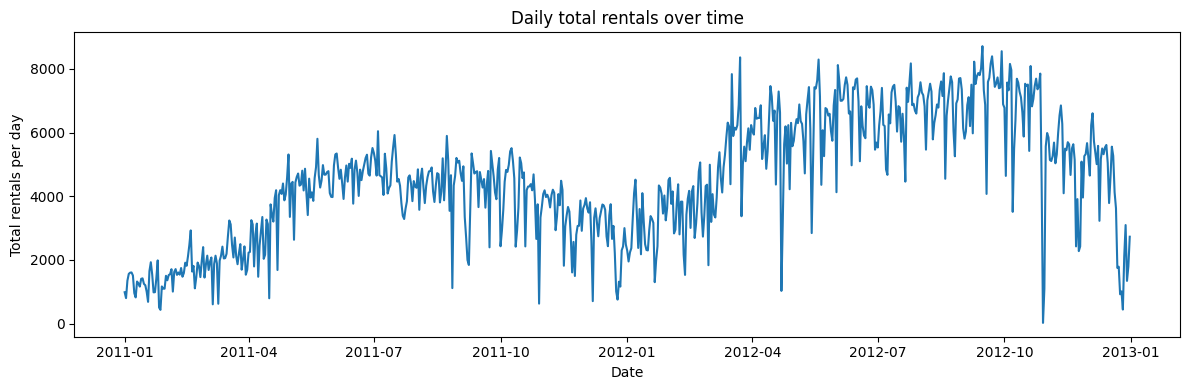

In [11]:
import matplotlib.pyplot as plt

df['dteday'] = pd.to_datetime(df['dteday'])
df['year'] = df['dteday'].dt.year

ndays = df['dteday'].nunique()
print('Date range:', df['dteday'].min(), 'to', df['dteday'].max())
print('Unique days (records):', ndays)


plt.figure(figsize=(12,4))
plt.plot(df.sort_values('dteday').groupby('dteday')['cnt'].sum())
plt.title('Daily total rentals over time')
plt.ylabel('Total rentals per day')
plt.xlabel('Date')
plt.tight_layout()

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
for i,col in enumerate(['temp','atemp','hum','windspeed','cnt']):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()

plt.figure(figsize=(8,3))
sns.boxplot(x=df['cnt'])
plt.title('Boxplot — total count (cnt)')
plt.tight_layout()

In [ ]:
cat_cols = ['season','mnth','hr','weekday','weathersit','holiday','workingday']
df.melt(value_vars=cat_cols).groupby(['variable', 'value']).size()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='hr', y='cnt', data=df.groupby('hr')['cnt'].mean().reset_index())
plt.title('Average rentals by hour')
plt.subplot(1,2,2)
sns.barplot(x='weathersit', y='cnt', data=df.groupby('weathersit')['cnt'].mean().reset_index())
plt.title('Average rentals by weather situation')
plt.tight_layout()

In [ ]:
corr = df[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='BrBG')
plt.title('Correlation matrix (numeric features)')
plt.tight_layout()

Data Preparation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("Missing values per column:")
print(df.isnull().sum())

dup_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", dup_count)

# Load dataset (adjust path!)
df = pd.read_csv("data/hour.csv")

# Convert date column & extract year
df['dteday'] = pd.to_datetime(df['dteday'])
df['year'] = df['dteday'].dt.year

# Drop atemp due to multicollinearity
df = df.drop(columns=['atemp'])

# One-hot encode categorical variables
cat_cols = ['season','mnth','hr','weekday','weathersit','holiday','workingday']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale numerical features
num_cols = ['temp','hum','windspeed']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Define input (X) and target (y)
X = df.drop(columns=['cnt', 'casual', 'registered', 'dteday'])  # cnt is the prediction target
y = df['cnt']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data preparation completed successfully.")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
